## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# Read data from day.csv file

bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#check if any column has null values
bikesharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#EDA process

#Data Cleaning
#Dropping column instant, dteday, casual, registered
#dteday is not required since we have other columns representing it
#casual,registered columns are not required since we ahve cnt column representing sum of both the columns

bikesharing.drop(['instant','dteday','casual','registered'],axis=1,inplace = True)
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


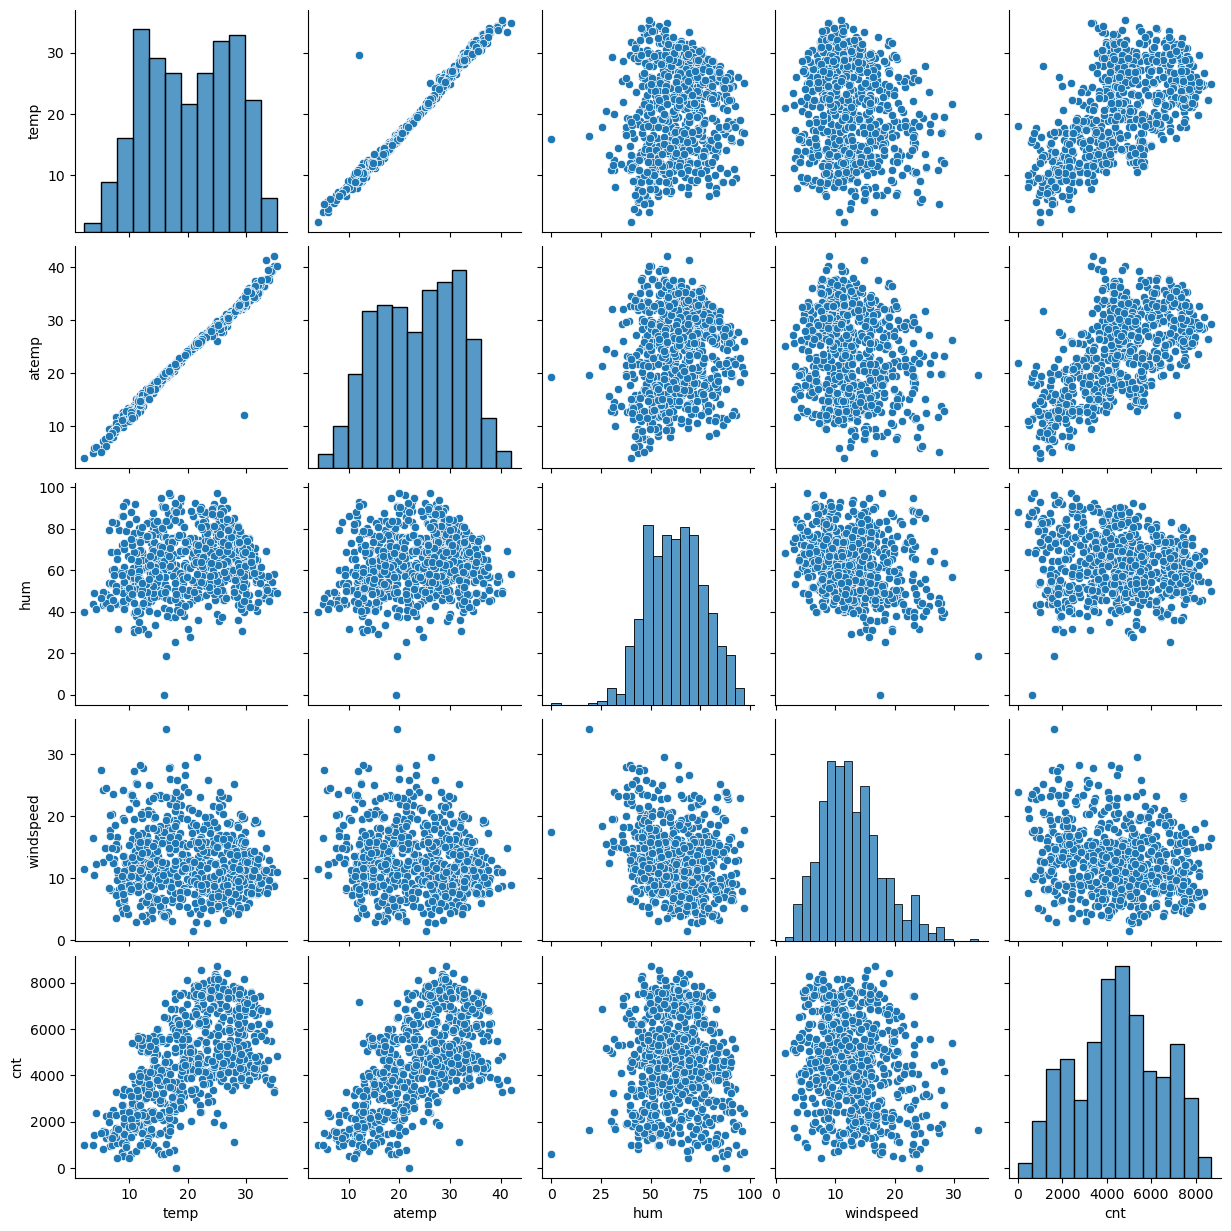

In [7]:
# visualising the numerical variables
sns.pairplot(bikesharing[['temp','atemp','hum','windspeed','cnt']])
plt.show()

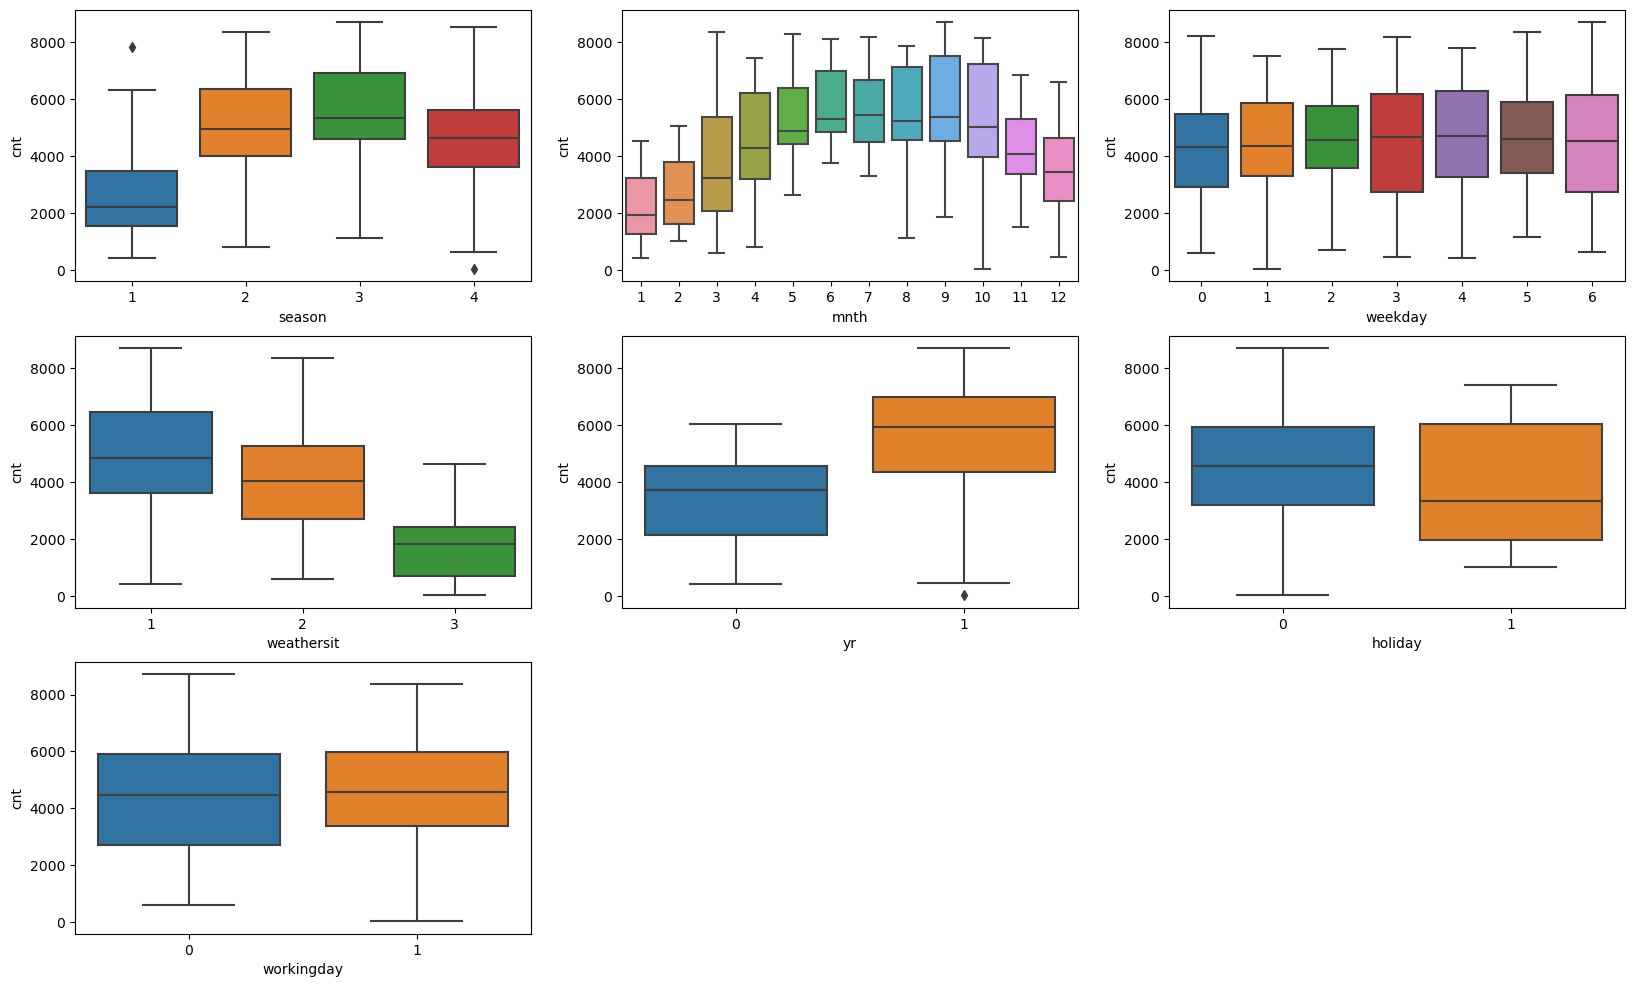

In [8]:
# visualising the categorical variables
plt.figure(figsize=(20,12))
plt. subplot(3, 3, 1)
sns.boxplot(x='season',y='cnt', data = bikesharing)
plt. subplot(3, 3, 2)
sns.boxplot(x='mnth',y='cnt', data = bikesharing)
plt. subplot(3, 3, 3)
sns.boxplot(x='weekday',y='cnt', data = bikesharing)
plt. subplot(3, 3, 4)
sns.boxplot(x='weathersit',y='cnt', data = bikesharing)
plt. subplot(3, 3, 5)
sns.boxplot(x='yr',y='cnt', data = bikesharing)
plt. subplot(3, 3, 6)
sns.boxplot(x='holiday',y='cnt', data = bikesharing)
plt. subplot(3, 3, 7)
sns.boxplot(x='workingday',y='cnt', data = bikesharing)
plt.show()

In [9]:
# Season 2, 3 and 4 shows good booking with mean value greater then 4000 compared to 1
# Mnth 8,9,10 show good booking with mean value greater then 4000.
# Weekday - no significant difference
# WeatherSit 1 is significantly better then others having mean value greater then 4000 booking
# yr 1 (2019) is better year of booking bike compared to 0 (2018)
# Holiday shows no significant observation.Data is consistent.
# Working day shows no significant observation. Data is consistent.

In [10]:
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikesharing.weathersit.replace({1:'clear',2:'mist',3:'lightsnow',4:'heayrain'},inplace = True)

bikesharing = pd.get_dummies(data=bikesharing,columns=['season','mnth','weekday','weathersit'], drop_first=True)
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightsnow,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    uint8  
 9   season_summer         730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_2                730 non-null    uint8  
 12  mnth_3                730 non-null    uint8  
 13  mnth_4                730 non-null    uint8  
 14  mnth_5                730 non-null    uint8  
 15  mnth_6                7

In [12]:
#Splitting  on train set and test
df_train, df_test = train_test_split(bikesharing, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [13]:
#Min Max scaler

#Instantaite an object
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightsnow,weathersit_mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,1


In [14]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


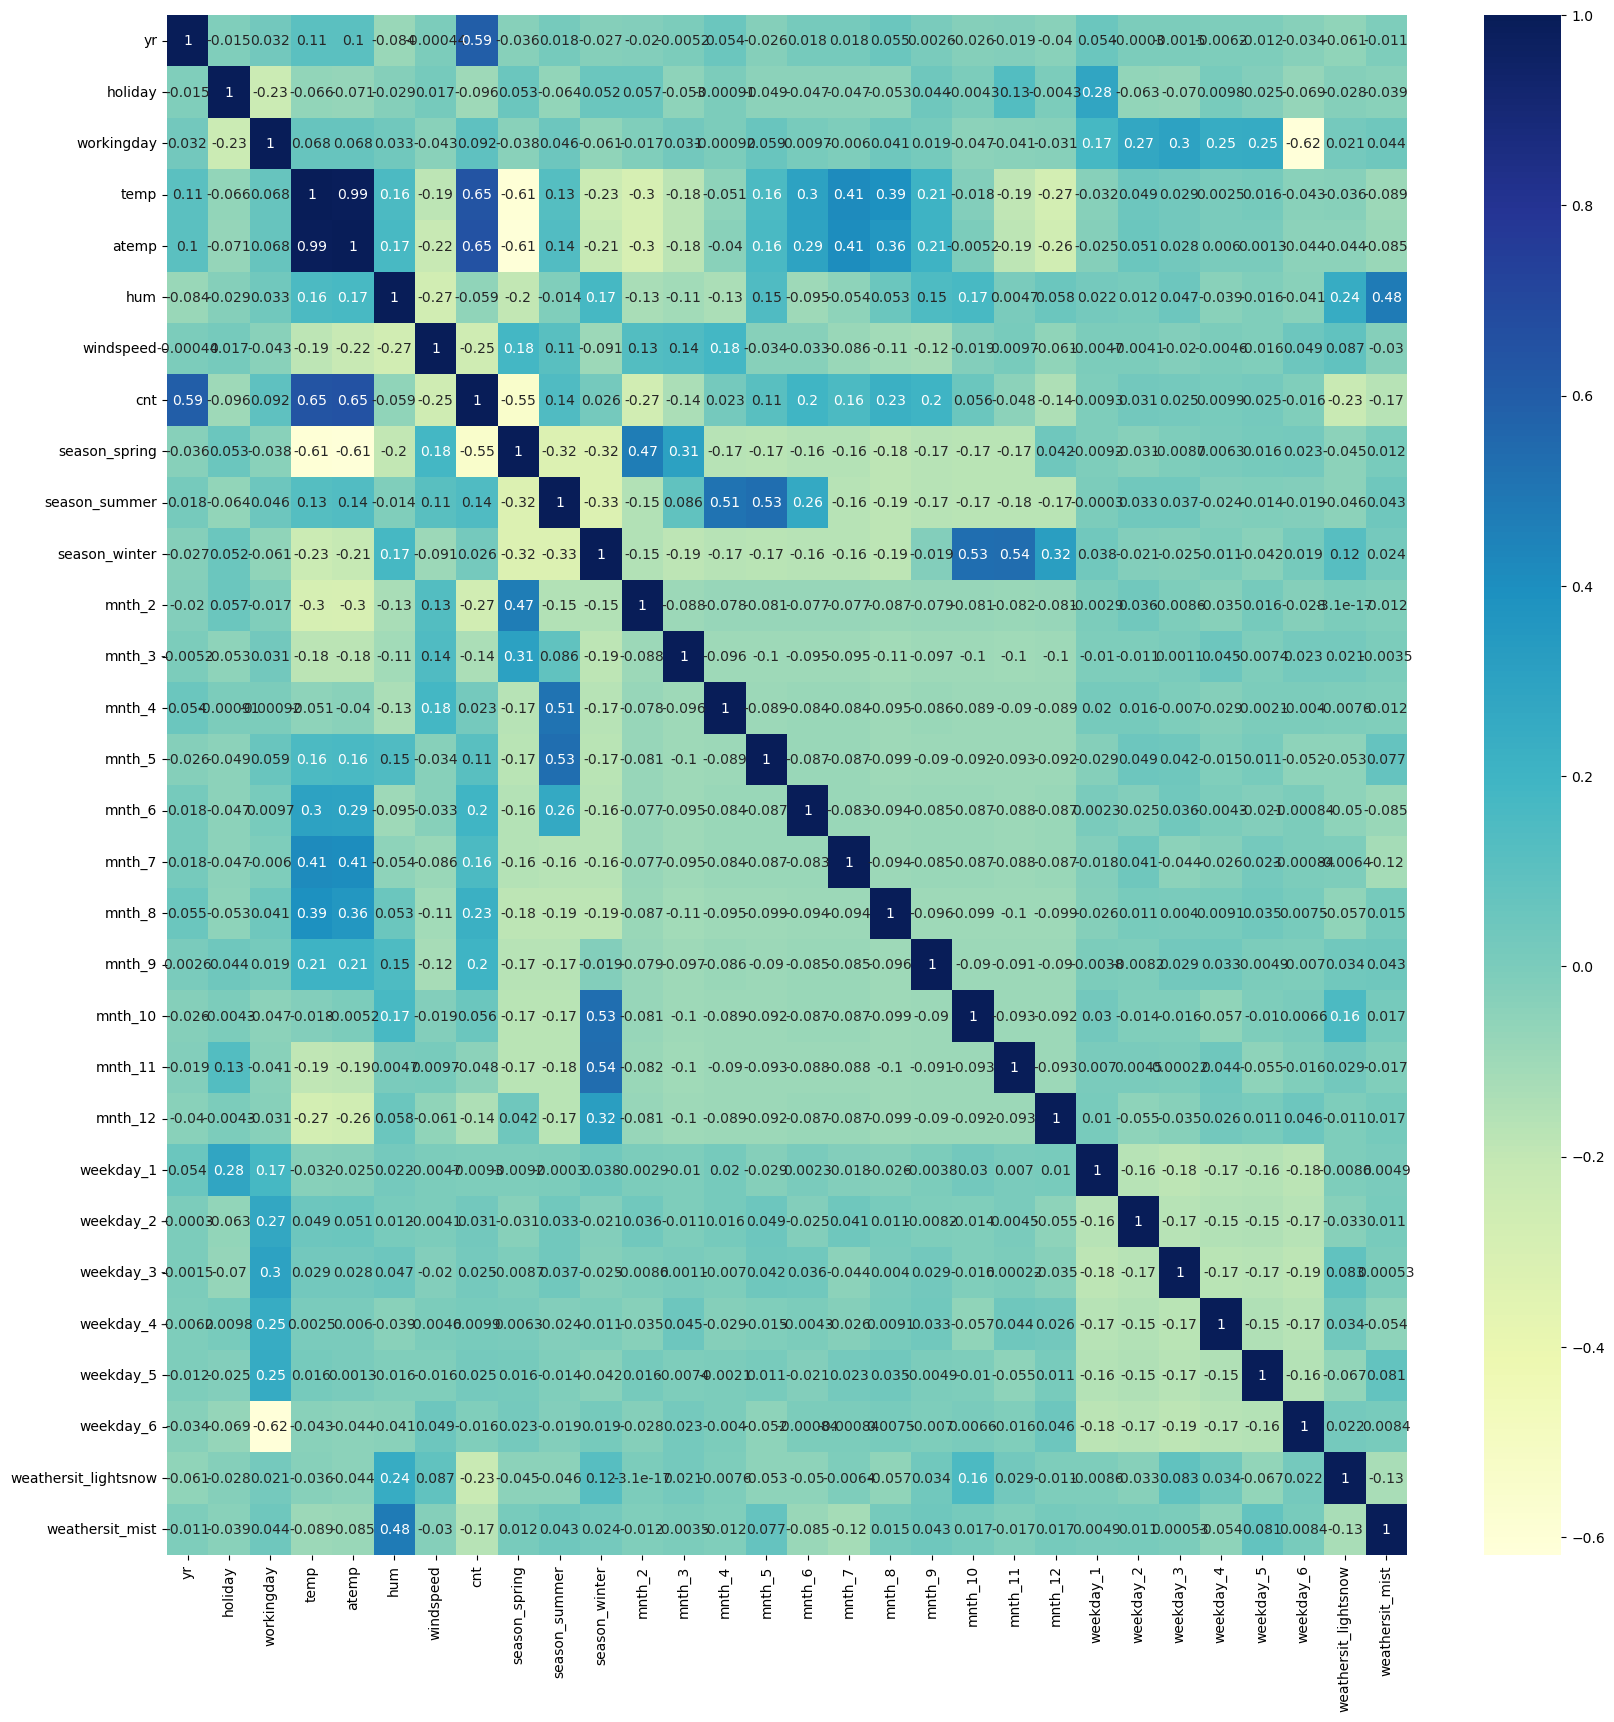

In [15]:
# Training the model
plt.figure(figsize = (20,20))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [16]:
#X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [17]:
#Running RFE with the output number of the variable equal to 24
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=24) # running RFE where 24 is number of variables
rfe = rfe.fit(X_train,y_train)

In [18]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', False, 2),
 ('weekday_2', False, 3),
 ('weekday_3', False, 5),
 ('weekday_4', False, 6),
 ('weekday_5', False, 4),
 ('weekday_6', True, 1),
 ('weathersit_lightsnow', True, 1),
 ('weathersit_mist', True, 1)]

In [19]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_6', 'weathersit_lightsnow',
       'weathersit_mist'],
      dtype='object')


In [20]:
X_train.columns[~rfe.support_]

Index(['weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'], dtype='object')

In [21]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [22]:
##Model 1
#Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
#create model
lr = sm.OLS(y_train,X_train_rfe)
#fit
lr_model = lr.fit()
#params
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.68e-184
Time:                        22:23:11   Log-Likelihood:                 525.69
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     485   BIC:                            -895.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2225 

In [23]:
#function to generate model and VIF details

def generateModel(X,field):
    X_train_new = X.drop(field,axis=1)
    # create another model
    X_train_lm = sm.add_constant(X_train_new)
    #create model
    lr = sm.OLS(y_train,X_train_lm)
    #fit
    lr_model = lr.fit()
    #params
    print(lr_model.summary())
    #Calculate the VIFs for the new model    
    vif = pd.DataFrame()
    X_vif = X_train_new;
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending=False)
    print(vif)
    return X_train_new,X_train_lm,lr_model

In [24]:
#Remove variables having pvalues > 0.05 and VIF > 5
X_train_rfe.drop('const',axis=1,inplace=True)
X_train_new,X_train_lm,lr_model = generateModel(X_train_rfe,'atemp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.07e-185
Time:                        22:23:11   Log-Likelihood:                 525.65
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     486   BIC:                            -901.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2225 

In [25]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_7')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.75e-186
Time:                        22:23:12   Log-Likelihood:                 525.42
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     487   BIC:                            -907.5
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2353 

In [26]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_11')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          8.46e-187
Time:                        22:23:12   Log-Likelihood:                 525.29
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -913.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2380 

In [27]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_12')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          7.28e-188
Time:                        22:23:12   Log-Likelihood:                 525.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2385 

In [28]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_2')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.29e-188
Time:                        22:23:12   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2392 

In [29]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_4')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.84e-189
Time:                        22:23:12   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2424 

In [30]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_6')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.55e-190
Time:                        22:23:12   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2379 

In [31]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_5')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.46e-190
Time:                        22:23:12   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2264 

In [32]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'mnth_3')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.17e-191
Time:                        22:23:12   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2244 

In [33]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'hum')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.58e-188
Time:                        22:23:12   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1429 

In [34]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'holiday')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.95e-188
Time:                        22:23:12   Log-Likelihood:                 507.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     496   BIC:                            -928.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1358 

In [35]:
X_train_new,X_train_lm,lr_model = generateModel(X_train_new,'temp')

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.69e-154
Time:                        22:23:12   Log-Likelihood:                 423.93
No. Observations:                 510   AIC:                            -821.9
Df Residuals:                     497   BIC:                            -766.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5101 

In [36]:
# Since all variables pvalue < 0.05 and VIF < 5, Model 15 can be final model 

In [37]:
## Final Model coefficients
lr_model.params

#Since F statistic is high and Prob (F-statistic) is ~ 0 and all coefficients are non zero  the model is significant.

const                   0.510140
yr                      0.247188
workingday              0.057290
windspeed              -0.174061
season_spring          -0.275540
season_summer          -0.018926
season_winter          -0.087453
mnth_8                  0.041314
mnth_9                  0.096982
mnth_10                 0.097463
weekday_6               0.064399
weathersit_lightsnow   -0.314818
weathersit_mist        -0.094173
dtype: float64

#  Model Interpretation

y = B0 + B1X1 + B2X2 ...BnXn

y = 0.510140 + 0.247188 * ye + 0.057290 * workingday - 0.174061 * windspeed - 0.275540 * season_spring  - 0.018926 * season_summer  - 0.087453 * season_winter +  0.041314 * mnth_8 + 0.096982 * mnth_9 + 0.097463 * mnth_10 + 0.064399 * weekday_6 - 0.314818 * weathersit_lightsnow - 0.094173  * weather_mist

#### Variables : 
- yr, workingday, mnth_8, mnth_9, mnth_10, weekday_6 has positive impact on booking rental. 1 unit increase in variable will increase rental

- windspeed, season_spring, season_summer, season_winter, weathersit_lightsnow, weather_mist has negative impact on booking rental. 1 unit increase in variable will decrease rental

# Residual Analysis

In [38]:
y_train_pred = lr_model.predict(X_train_lm)

Text(0.5, 0, 'Errors')

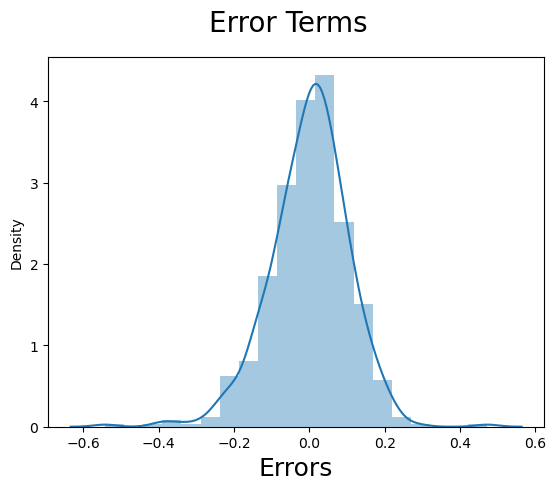

In [39]:
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot(res,bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors',fontsize=18)

#errors are normally distributed

In [40]:
#Fit on data in test model

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_lightsnow,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [41]:
y_test = df_test.pop('cnt')
X_test = df_test

In [42]:
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,workingday,windspeed,season_spring,season_summer,season_winter,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_lightsnow,weathersit_mist
184,1.0,0,0,0.084219,0,0,0,0,0,0,0,0,1
535,1.0,1,1,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,1,0,0,1,0,0,1
221,1.0,0,1,0.339570,0,0,0,1,0,0,0,0,0
152,1.0,0,1,0.537414,0,1,0,0,0,0,0,0,0


In [43]:
#predict on test model
y_test_pred = lr_model.predict(X_test_new)

Text(0, 0.5, 'y_train_pred')

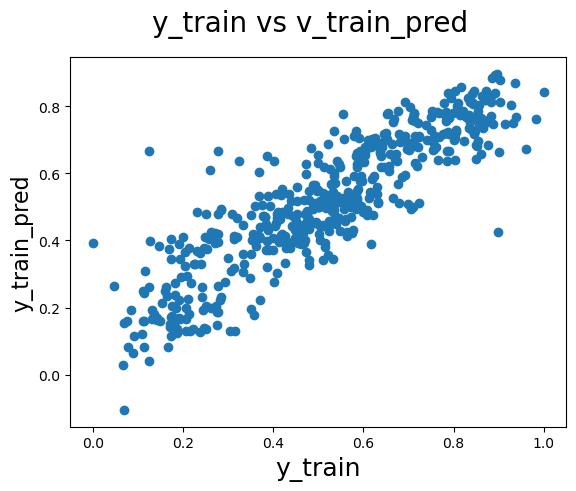

In [44]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs v_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)

Text(0, 0.5, 'y_test_pred')

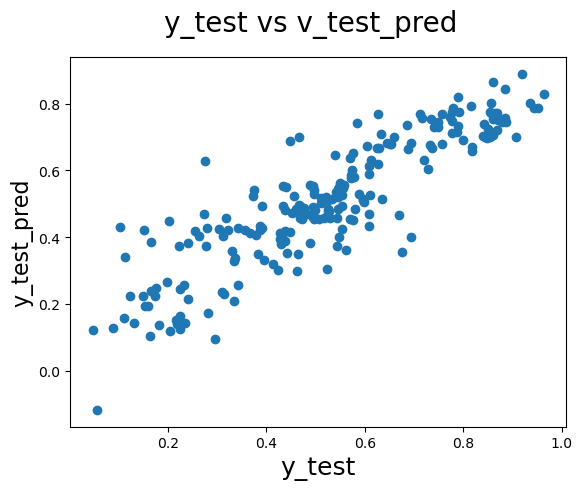

In [45]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs v_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)

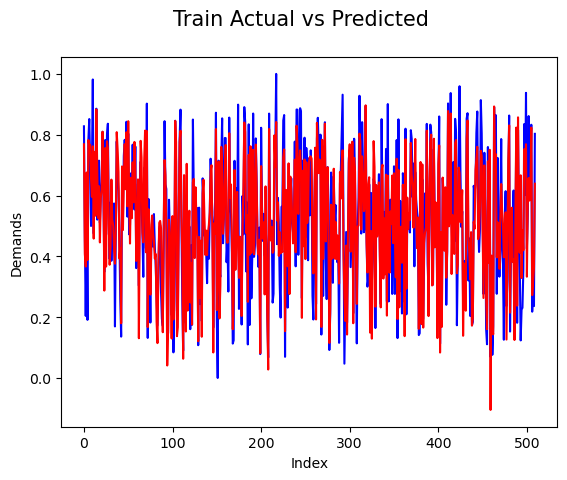

In [46]:
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Train Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

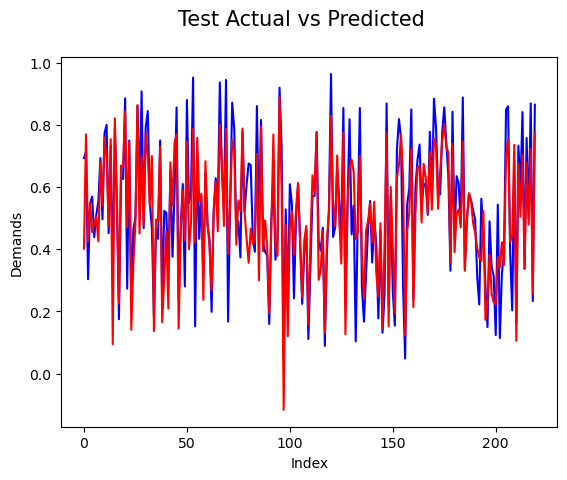

In [47]:
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Test Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

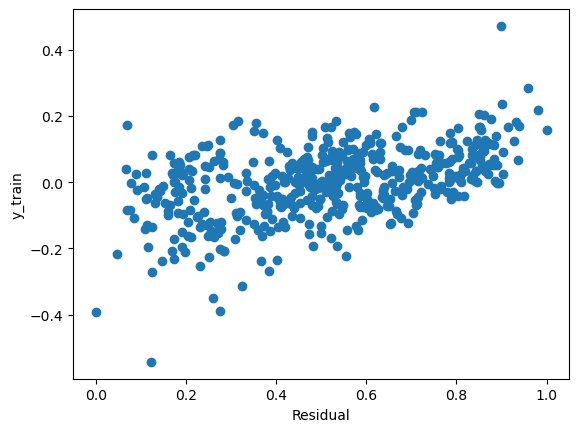

In [48]:
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

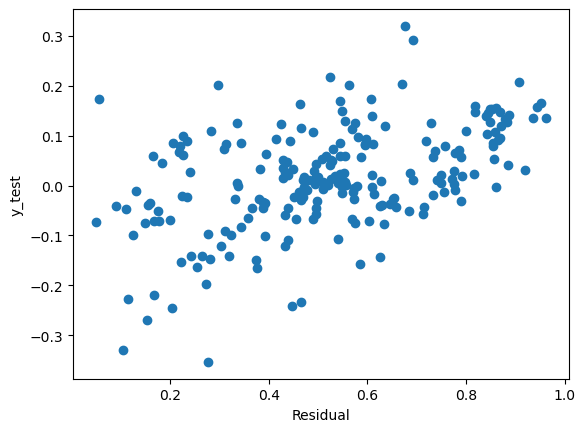

In [49]:
plt.scatter(y_test,y_test-y_test_pred)
plt.ylabel("y_test")
plt.xlabel("Residual")
plt.show()

In [50]:
print("Train Mean Square Error : " , mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print("Test Mean Square Error  : " , mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train Mean Square Error :  0.011105174272697737
Test Mean Square Error  :  0.010896879104357682


In [51]:
print("Train R2 Square : " , r2_score(y_true=y_train,y_pred=y_train_pred))
print("Test R2 Square  : " , r2_score(y_true=y_test,y_pred=y_test_pred))

Train R2 Square :  0.7790717032929404
Test R2 Square  :  0.772099899515238


# Summary

Based on analysis below inputs can help company to expand the business

1) As covid cases are decreasing the demand is increasing on year basis.We can see 2019 has incremental demand.

2) Demand is high in mnth_9 (September) & mnth_10 (October). 

3) In Spring, Summer and Winter Season company should provide more offers during that time to increase business demand.

4) Demand increases on weekday_6 (Saturday)